In [1]:
from cartopy.io.shapereader import Reader
from bokeh.models import ColumnDataSource, HoverTool, LogColorMapper, WidgetBox, ColorMapper
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, Figure
from bokeh.layouts import column
from bokeh.palettes import Viridis256 as palette
# from bokeh.palettes import Magma256 as palette
from bokeh.models.widgets import Panel, Tabs, Slider, RadioButtonGroup
import os
import pandas as pd
import pickle
import numpy as np
from ipywidgets import interact, SelectionSlider, Select, ToggleButtons

output_notebook()

Loading BokehJS ...

In [2]:
pickle_data = open(os.path.join(os.getcwd(), 'data', 'processed', 'clean_data.pickle'), 'rb')
data = pickle.load(pickle_data)

geoids = list(set(data.index))

In [3]:
# read the shapefile
tracts = Reader(r'census_tract_shapefile/austin_metro_tracts.shp')
# extract the x's and y's (bokeh preferred format is list of lists)
xs, ys, names, tract = [], [], [], []
for r, g in zip(tracts.records(), tracts.geometries()):
    if int(r.attributes['GEOID']) in geoids:
        xs.append(list(g[0].exterior.coords.xy[0]))
        ys.append(list(g[0].exterior.coords.xy[1]))
        names.append(int(r.attributes['GEOID']))
        tract.append(float(r.attributes['GEOID'][-6:]) / 100)
print(len(xs), len(ys), len(names), len(tract))

343 343 343 343


In [4]:
# set up the color mapper
color_mapper = LogColorMapper(palette=palette)
# choose which bokeh tools are included
TOOLS = 'pan, wheel_zoom, hover, reset, save'

In [5]:
def make_plot(year):
    income = data[data['year'] == year].loc[names, 'income_index'].tolist()
    education = data[data['year'] == year].loc[names, 'education_index'].tolist()
    race = data[data['year'] == year].loc[names, 'white_alone'].tolist()
    rent = data[data['year'] == year].loc[names, 'rent_index'].tolist()
    employed = data[data['year'] == year].loc[names, 'employed'].tolist()
    value = data[data['year'] == year].loc[names, 'value_index'].tolist()
    years = [year] * len(geoids)
    
    source = ColumnDataSource(data = dict(
        years=years,
        x=xs,
        y=ys,
        name=names,
        tract=tract,
        income=income,
        education=education,
        race=race,
        rent=rent,
        employed=employed,
        value=value,
    ))
    
    p_race = figure(title='Percentage White - {}'.format(year), tools=TOOLS, x_axis_location=None,
                    y_axis_location=None)
    p_race.patches('x', 'y', source=source, fill_color={'field': 'race', 'transform': color_mapper},
                   fill_alpha=0.7, line_color='black', line_width=0.5)
    hover_race = p_race.select_one(HoverTool)
    hover_race.point_policy = 'follow_mouse'
    hover_race.tooltips = [
        ('Year', '@years'),
        ('GeoID', '@name'),
        ('Census Tract', '@tract'),
        ('Lon, Lat', '$x, $y'),
        ('Percentage White', '@race')
    ]
    tab_race = Panel(child=p_race, title='Race')
    
    p_income = figure(title='Income - {}'.format(year), tools=TOOLS, x_axis_location=None,
                      y_axis_location=None)
    p_income.patches('x', 'y', source=source, fill_color={'field': 'income', 'transform': color_mapper},
                     fill_alpha=0.7, line_color='black', line_width=0.5)
    hover_income = p_income.select_one(HoverTool)
    hover_income.point_policy = 'follow_mouse'
    hover_income.tooltips = [
        ('Year', '@years'),
        ('GeoID', '@name'),
        ('Census Tract', '@tract'),
        ('Lon, Lat', '$x, $y'),
        ('Income Index', '@income{0,0}')
    ]
    tab_income = Panel(child=p_income, title='Income')
    
    p_education = figure(title='Education Attained - {}'.format(year), tools=TOOLS, x_axis_location=None,
                         y_axis_location=None)
    p_education.patches('x', 'y', source=source, fill_color={'field': 'education', 'transform': color_mapper},
                        fill_alpha=0.7, line_color='black', line_width=0.5)
    hover_education = p_education.select_one(HoverTool)
    hover_education.point_policy = 'follow_mouse'
    hover_education.tooltips = [
        ('Year', '@years'),
        ('GeoID', '@name'),
        ('Census Tract', '@tract'),
        ('Lon, Lat', '$x, $y'),
        ('Education Index', '@education')
    ]
    tab_education = Panel(child=p_education, title='Education')
    
    p_employed = figure(title='Percentage Employed - {}'.format(year), tools=TOOLS, x_axis_location=None,
                        y_axis_location=None)
    p_employed.patches('x', 'y', source=source, fill_color={'field': 'employed', 'transform': color_mapper},
                        fill_alpha=0.7, line_color='black', line_width=0.5)
    hover_employed = p_employed.select_one(HoverTool)
    hover_employed.point_policy = 'follow_mouse'
    hover_employed.tooltips = [
        ('Year', '@years'),
        ('GeoID', '@name'),
        ('Census Tract', '@tract'),
        ('Lon, Lat', '$x, $y'),
        ('Percentage Employed', '@employed')
    ]
    tab_employed = Panel(child=p_employed, title='Employed')
    
    p_rent = figure(title='Rent - {}'.format(year), tools=TOOLS, x_axis_location=None,
                    y_axis_location=None)
    p_rent.patches('x', 'y', source=source, fill_color={'field': 'rent', 'transform': color_mapper},
                  fill_alpha=0.7, line_color='black', line_width=0.5)
    hover_rent = p_rent.select_one(HoverTool)
    hover_rent.point_policy = 'follow_mouse'
    hover_rent.tooltips = [
        ('Year', '@years'),
        ('GeoID', '@name'),
        ('Census Tract', '@tract'),
        ('Lon, Lat', '$x, $y'),
        ('Rent Index', '@rent')
    ]
    tab_rent = Panel(child=p_rent, title='Rent')
    
    p_value = figure(title='Home Value - {}'.format(year), tools=TOOLS, x_axis_location=None,
                     y_axis_location=None)
    p_value.patches('x', 'y', source=source, fill_color={'field': 'value', 'transform': color_mapper},
                    fill_alpha=0.7, line_color='black', line_width=0.5)
    hover_value = p_value.select_one(HoverTool)
    hover_value.point_policy = 'follow_mouse'
    hover_value.tooltips = [
        ('Year', '@years'),
        ('GeoID', '@name'),
        ('Census Tract', '@tract'),
        ('Lon, Lat', '$x, $y'),
        ('Home Value Index', '@value')
    ]
    tab_value = Panel(child=p_value, title='Home Value')
    
    tabs = Tabs(tabs=[tab_income, tab_education, tab_race, tab_employed,
                      tab_rent, tab_value])
    
    show(tabs)

In [6]:
toggle = ToggleButtons(
    options=['2000', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
    value='2000',
    description='Year:'
)

interact(make_plot, year=toggle);

interactive(children=(ToggleButtons(description='Year:', options=('2000', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'), value='2000'), Output()), _dom_classes=('widget-interact',))

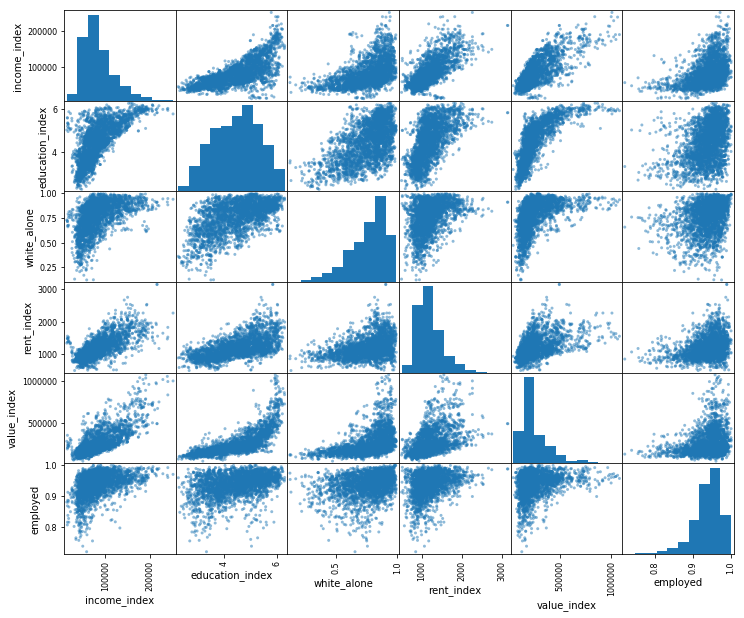

In [11]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(data[data.columns[1:]], figsize=(12, 10))
plt.show()